# **Introduction and Problem statement**

**Delhivery** is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.The problem statement is to help the Data team who builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


## **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Shape of the given dataset

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Removing unknown fields

In [ ]:
fields = ["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"]
df = df.drop(columns = fields)

Checking for unique entries in columns

In [ ]:
for i in df.columns:
  print(f"Unique entries in {i: <30} = {df[i].nunique()}")

Unique entries in data                           = 2
Unique entries in trip_creation_time             = 14817
Unique entries in route_schedule_uuid            = 1504
Unique entries in route_type                     = 2
Unique entries in trip_uuid                      = 14817
Unique entries in source_center                  = 1508
Unique entries in source_name                    = 1498
Unique entries in destination_center             = 1481
Unique entries in destination_name               = 1468
Unique entries in od_start_time                  = 26369
Unique entries in od_end_time                    = 26369
Unique entries in start_scan_to_end_scan         = 1915
Unique entries in actual_distance_to_destination = 144515
Unique entries in actual_time                    = 3182
Unique entries in osrm_time                      = 1531
Unique entries in osrm_distance                  = 138046
Unique entries in segment_actual_time            = 747
Unique entries in segment_osrm_time            

**Updating the datatypes of the columns accordingly**

In [ ]:
df["data"] = df["data"].astype("category")
df["route_type"] = df["route_type"].astype("category")

In [ ]:
float_cols = ["actual_distance_to_destination","actual_time","osrm_time","osrm_distance","segment_actual_time","segment_osrm_time","segment_osrm_distance"]
for i in float_cols:
  df[i] = df[i].astype("float32")

In [ ]:
datetime_columns = ["trip_creation_time", "od_start_time","od_end_time"]
for i in datetime_columns:
  df[i] = pd.to_datetime(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

**Time period of the given data**

In [ ]:
df["trip_creation_time"].min(), df["od_end_time"].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

# **Data cleaning and exploration**

In [ ]:
np.any(df.isnull())

True

In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [ ]:
missing_source_name = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
missing_destination_name = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

**To check if the missing columns in the source name and missing columns in the destination name are similar**

In [ ]:
np.all(df.loc[df['source_name'].isnull(), 'source_center'].isin(missing_destination_name))

False

**Treating missing destination and source names**

In [ ]:
count = 1
for i in missing_destination_name:
    df.loc[df['destination_center'] == i, 'destination_name'] = df.loc[df['destination_center'] == i, 'destination_name'].replace(np.nan, f'location_{count}')
    count += 1

In [ ]:
d = {}
for i in missing_source_name:
    d[i] = df.loc[df['destination_center'] == i, 'destination_name'].unique()
for idx, val in d.items():
    if len(val) == 0:
        d[idx] = [f'location_{count}']
        count += 1
d2 = {}
for idx, val in d.items():
    d2[idx] = val[0]
for i, v in d2.items():
    print(i, v)

IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
IND331022A1B location_14
IND505326AAB location_6
IND852118A1B location_7


In [ ]:
for i in missing_source_name:
    df.loc[df['source_center'] == i, 'source_name'] = df.loc[df['source_center'] == i, 'source_name'].replace(np.nan, d2[i])

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [ ]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,961.262986,234.073380,416.927521,213.868286,284.771301,36.196110,18.507547,22.829018
std,1037.012769,344.990021,598.103638,308.011078,421.119293,53.571156,14.775960,17.860661
min,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144867,1508,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144867,1481,Gurgaon_Bilaspur_HB (Haryana),15192


In [ ]:
groupid = ['trip_uuid', 'source_center', 'destination_center']
df1= df.groupby(by = groupid, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})
df1

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,534.0,670.620483
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,474.0,649.852783
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,26.0,28.199501
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,39.0,55.989899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,231.0,317.740784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.521301,49.0,42.0,42.143101
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673836,90.0,48.0,40.608002,89.0,77.0,78.586899
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661944,30.0,14.0,16.018499,29.0,14.0,16.018400
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546738,233.0,42.0,52.530300,233.0,42.0,52.530300


**Calculating the time taken between od_start_time and od_end_time and keep it as a feature, followed by dropping the original columns**

In [ ]:
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df1['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

### **Merging of rows and aggregation of fields**

In [ ]:
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
df2

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732849,1562.0,717.0,991.352295,1548.0,1008.0,1320.473267
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186905,143.0,68.0,85.111000,141.0,65.0,84.189400
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404297,3347.0,1740.0,2354.066650,3308.0,1941.0,2545.267822
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.680000,59.0,16.0,19.876600
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448502,341.0,117.0,146.791794,340.0,115.0,146.791901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,57.762333,83.0,62.0,73.462997,82.0,62.0,64.855103
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.59,60.0,15.513784,21.0,12.0,16.088200,21.0,11.0,16.088299
14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,38.684837,282.0,48.0,58.903702,281.0,88.0,104.886597
14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,134.723831,264.0,179.0,171.110306,258.0,221.0,223.532394


## **2. Build some features to prepare the data for actual analysis. Extract features from the below fields:**

### Source Name: Split and extract features out of destination. City-place-code (State)

In [ ]:
def location_name_to_state(x):
    l = x.split('(')
    if len(l) == 1:
        return l[0]
    else:
        return l[1].replace(')', "")

In [ ]:
def location_name_to_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [ ]:
def location_name_to_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

In [ ]:
df2['source_state'] = df2['source_name'].apply(location_name_to_state)
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'location_9', 'location_3', 'location_2', 'location_14',
       'location_7'], dtype=object)

In [ ]:
df2['source_state'].nunique()

34

In [ ]:
df2['source_city'] = df2['source_name'].apply(location_name_to_city)
print('No of source cities :', df2['source_city'].nunique())
df2['source_city'].unique()[:100]

No of source cities : 690


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Canacona', 'Bilimora',
       'SultnBthry', 'Lucknow', 'Vellore', 'Bhuj', 'Dinhata',
       'Margheri

In [ ]:
df2['source_place'] = df2['source_name'].apply(location_name_to_place)
df2['source_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L', 'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Panchot_IP', 'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB',
       'Swamylyt_D', 'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3',
       'Vasanthm_I', 'Poonamallee_

**Destination Name: Split and extract features out of destination. City-place-code (State)**

In [ ]:
df2['destination_state'] = df2['destination_name'].apply(location_name_to_state)
df2['destination_state'].head(10)

0    Uttar Pradesh
1        Karnataka
2          Haryana
3      Maharashtra
4        Karnataka
5       Tamil Nadu
6       Tamil Nadu
7        Karnataka
8          Gujarat
9            Delhi
Name: destination_state, dtype: object

In [ ]:
df2['destination_city'] = df2['destination_name'].apply(location_name_to_city)
df2['destination_city'].head()

0        Kanpur
1    Doddablpur
2       Gurgaon
3        Mumbai
4        Sandur
Name: destination_city, dtype: object

In [ ]:
df2['destination_place'] = df2['destination_name'].apply(location_name_to_place)
df2['destination_place'].head()

0    Central_H_6
1     ChikaDPP_D
2    Bilaspur_HB
3      MiraRd_IP
4     WrdN1DPP_D
Name: destination_place, dtype: object

**Trip_creation_time: Extract features like month, year and day etc**

In [ ]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

In [ ]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')
df2['trip_creation_day'].head()

0    12
1    12
2    12
3    12
4    12
Name: trip_creation_day, dtype: int8

In [ ]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: trip_creation_month, dtype: int8

In [ ]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: trip_creation_year, dtype: int16

In [ ]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()

0    37
1    37
2    37
3    37
4    37
Name: trip_creation_week, dtype: int8

In [ ]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: trip_creation_hour, dtype: int8

# **Basic analysis after cleanup**

In [ ]:
df_final = df2
df_final.shape

(14817, 29)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   source_center                   14817 non-null  object        
 2   destination_center              14817 non-null  object        
 3   data                            14817 non-null  category      
 4   route_type                      14817 non-null  category      
 5   trip_creation_time              14817 non-null  datetime64[ns]
 6   source_name                     14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   od_total_time                   14817 non-null  float64       
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float32       
 11  ac

In [ ]:
df_final.isna().sum()

trip_uuid                         0
source_center                     0
destination_center                0
data                              0
route_type                        0
trip_creation_time                0
source_name                       0
destination_name                  0
od_total_time                     0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
source_state                      0
source_city                       0
source_place                      0
destination_state                 0
destination_city                  0
destination_place                 0
trip_creation_date                0
trip_creation_day                 0
trip_creation_month               0
trip_creation_year                0
trip_creation_week          

In [ ]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.697630,658.868223,23.460000,149.930000,280.770000,638.200000,7898.550000
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477829,305.388153,9.002461,22.837238,48.474072,164.583206,2186.531738
actual_time,14817.0,357.143768,561.396118,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.360992,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344711,370.395569,9.072900,30.819201,65.618805,208.475006,2840.081055
segment_actual_time,14817.0,353.892273,556.247925,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949783,314.542053,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201157,416.628387,9.072900,32.654499,70.154404,218.802399,3523.632324
trip_creation_day,14817.0,18.370790,7.893275,1.000000,14.000000,19.000000,25.000000,30.000000


In [ ]:
df_final.describe(include=object).T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
source_name,14817,938,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14817,1042,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14817,34,Maharashtra,2714
source_city,14817,690,Mumbai,1442
source_place,14817,761,Bilaspur_HB,1063
destination_state,14817,39,Maharashtra,2561
destination_city,14817,806,Mumbai,1548


**Different types of routes**

In [ ]:
route = df_final["route_type"].value_counts()
route

Carting    8908
FTL        5909
Name: route_type, dtype: int64

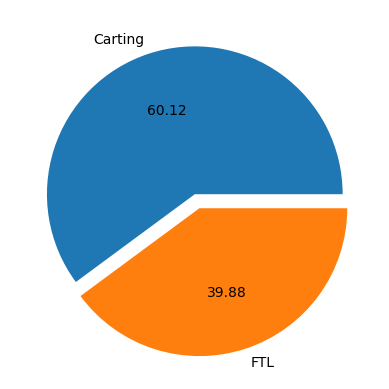

In [ ]:
plt.pie(route, labels = route.index, explode = [0,0.1], autopct = "%.2f")
plt.show()

**Trip creation day counts by trip id**

In [ ]:
df_day = df_final.groupby(by="trip_creation_day")["trip_uuid"].count().to_frame().reset_index()
df_day

,trip_creation_day,trip_uuid
0,1,605
1,2,552
2,3,631
3,12,747
4,13,750
5,14,712
6,15,783
7,16,616
8,17,722
9,18,791


[]

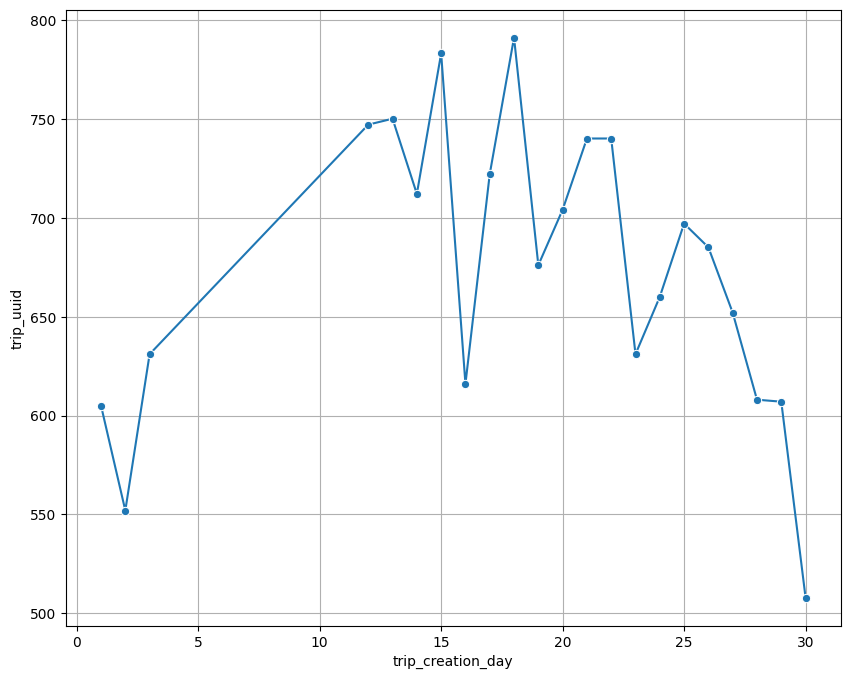

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_day, x = df_day["trip_creation_day"], y = df_day["trip_uuid"], marker = "o")
plt.grid("both")
plt.plot()

In [ ]:
trip_week = df_final["trip_creation_week"].value_counts()
trip_week

38    5004
39    4417
37    3608
40    1788
Name: trip_creation_week, dtype: int64

<Axes: xlabel='trip_creation_week', ylabel='count'>

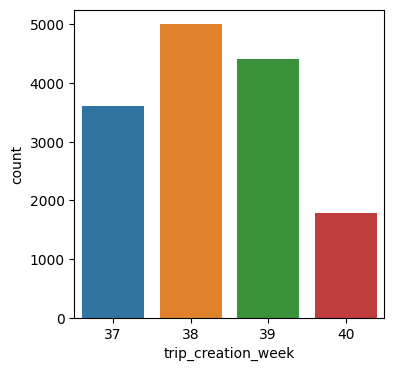

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_final, x=df_final["trip_creation_week"])

In [ ]:
trip_month = df_final["trip_creation_month"].value_counts()
trip_month

9     13029
10     1788
Name: trip_creation_month, dtype: int64

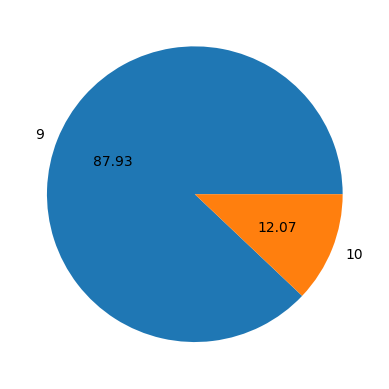

In [ ]:
plt.pie(trip_month, labels = trip_month.index, autopct = "%.2f")
plt.show()

In [ ]:
source_state = df_final["source_state"].value_counts()
source_state

Maharashtra               2714
Karnataka                 2143
Haryana                   1838
Tamil Nadu                1039
Telangana                  781
Uttar Pradesh              762
Gujarat                    750
Delhi                      728
West Bengal                665
Punjab                     536
Rajasthan                  514
Andhra Pradesh             434
Bihar                      350
Madhya Pradesh             317
Kerala                     289
Assam                      268
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Chandigarh                  93
Goa                         65
Chhattisgarh                43
Himachal Pradesh            34
Jammu & Kashmir             17
Dadra and Nagar Haveli      15
Pondicherry                 12
location_3                   8
Nagaland                     5
location_9                   5
Arunachal Pradesh            4
Mizoram                      4
location_2                   1
location

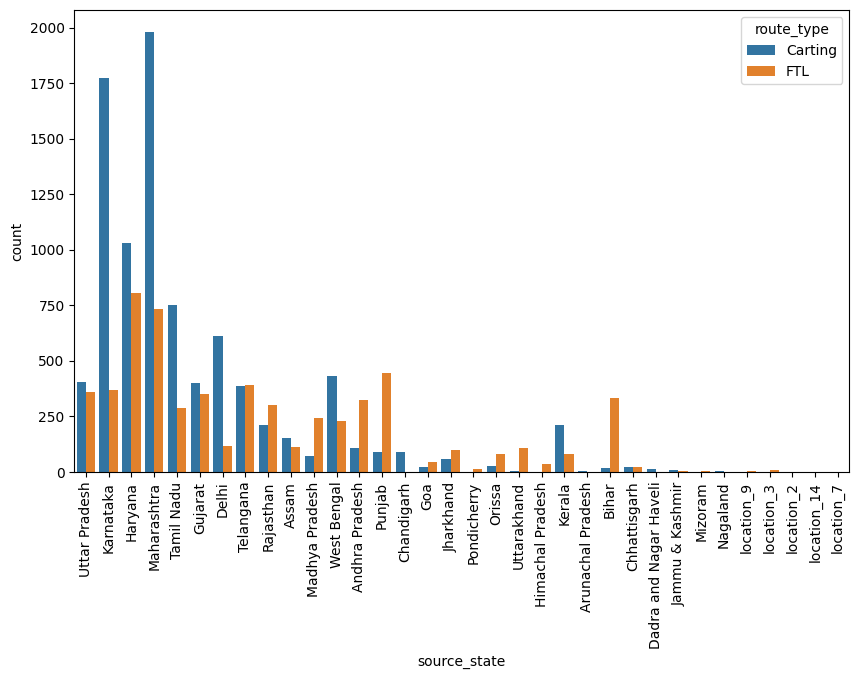

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_final, x=df_final["source_state"], hue=df_final["route_type"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
destination_state = df_final["destination_state"].value_counts()
destination_state.head()

Maharashtra      2561
Karnataka        2294
Haryana          1643
Tamil Nadu       1084
Uttar Pradesh     811
Name: destination_state, dtype: int64

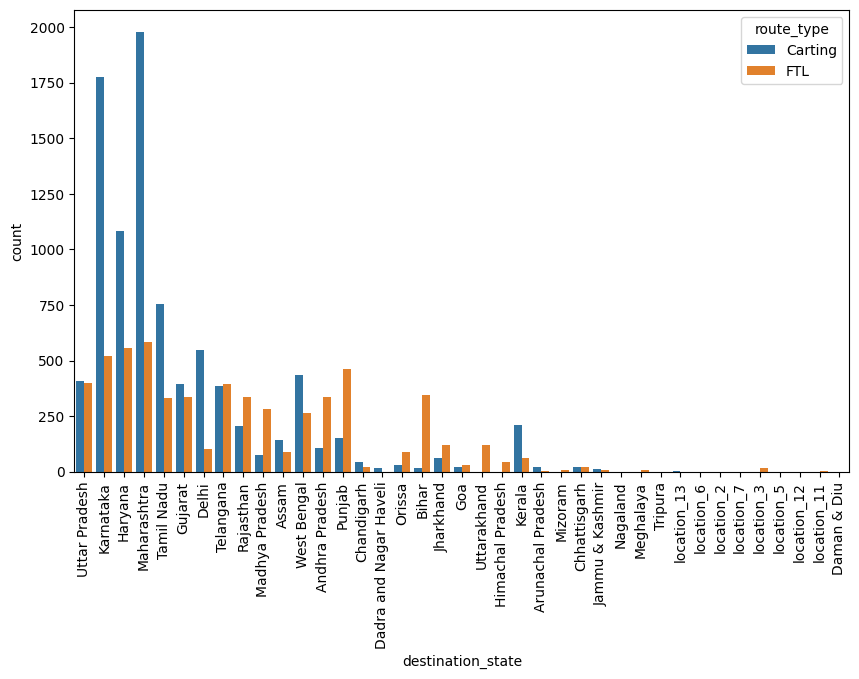

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_final, x=df_final["destination_state"], hue=df_final["route_type"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_source_city = df_final.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['percent'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:25]
df_source_city

,source_city,trip_uuid,percent
439,Mumbai,1442,9.73
237,Gurgaon,1165,7.86
169,Delhi,883,5.96
79,Bengaluru,726,4.90
100,Bhiwandi,697,4.70
58,Bangalore,648,4.37
136,Chennai,568,3.83
264,Hyderabad,524,3.54
516,Pune,480,3.24
357,Kolkata,356,2.40


In [ ]:
df_destination_city = df_final.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destination_city['percentage'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:25]
df_destination_city

,destination_city,trip_uuid,percentage
515,Mumbai,1548,10.45
96,Bengaluru,975,6.58
282,Gurgaon,936,6.32
200,Delhi,778,5.25
163,Chennai,595,4.02
72,Bangalore,551,3.72
308,Hyderabad,503,3.39
115,Bhiwandi,434,2.93
418,Kolkata,384,2.59
158,Chandigarh,339,2.29


In [ ]:
df_final.corr()

<ipython-input-121-dcfd88b6da59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()


,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour
od_total_time,1.000000,0.999999,0.918222,0.961094,0.926516,0.924219,0.961119,0.918490,0.919199,0.007311,-0.000677,NaN,0.006134,0.035781
start_scan_to_end_scan,0.999999,1.000000,0.918308,0.961147,0.926571,0.924299,0.961171,0.918561,0.919291,0.007303,-0.000676,NaN,0.006122,0.035723
actual_distance_to_destination,0.918222,0.918308,1.000000,0.953757,0.993561,0.997264,0.952821,0.987538,0.993061,0.004321,-0.004289,NaN,-0.002246,0.020800
actual_time,0.961094,0.961147,0.953757,1.000000,0.958593,0.959214,0.999989,0.953872,0.956967,0.007191,-0.006265,NaN,-0.001533,0.012795
osrm_time,0.926516,0.926571,0.993561,0.958593,1.000000,0.997580,0.957765,0.993259,0.991608,0.005034,-0.006653,NaN,-0.004816,0.026356
osrm_distance,0.924219,0.924299,0.997264,0.959214,0.997580,1.000000,0.958353,0.991798,0.994710,0.004840,-0.004961,NaN,-0.002587,0.022958
segment_actual_time,0.961119,0.961171,0.952821,0.999989,0.957765,0.958353,1.000000,0.953039,0.956106,0.007156,-0.006160,NaN,-0.001419,0.012814
segment_osrm_time,0.918490,0.918561,0.987538,0.953872,0.993259,0.991798,0.953039,1.000000,0.996092,0.005153,-0.004647,NaN,-0.001883,0.020712
segment_osrm_distance,0.919199,0.919291,0.993061,0.956967,0.991608,0.994710,0.956106,0.996092,1.000000,0.004733,-0.003261,NaN,-0.000321,0.017988
trip_creation_day,0.007311,0.007303,0.004321,0.007191,0.005034,0.004840,0.007156,0.005153,0.004733,1.000000,-0.767661,NaN,-0.044959,-0.008827


<Figure size 1500x1000 with 0 Axes>

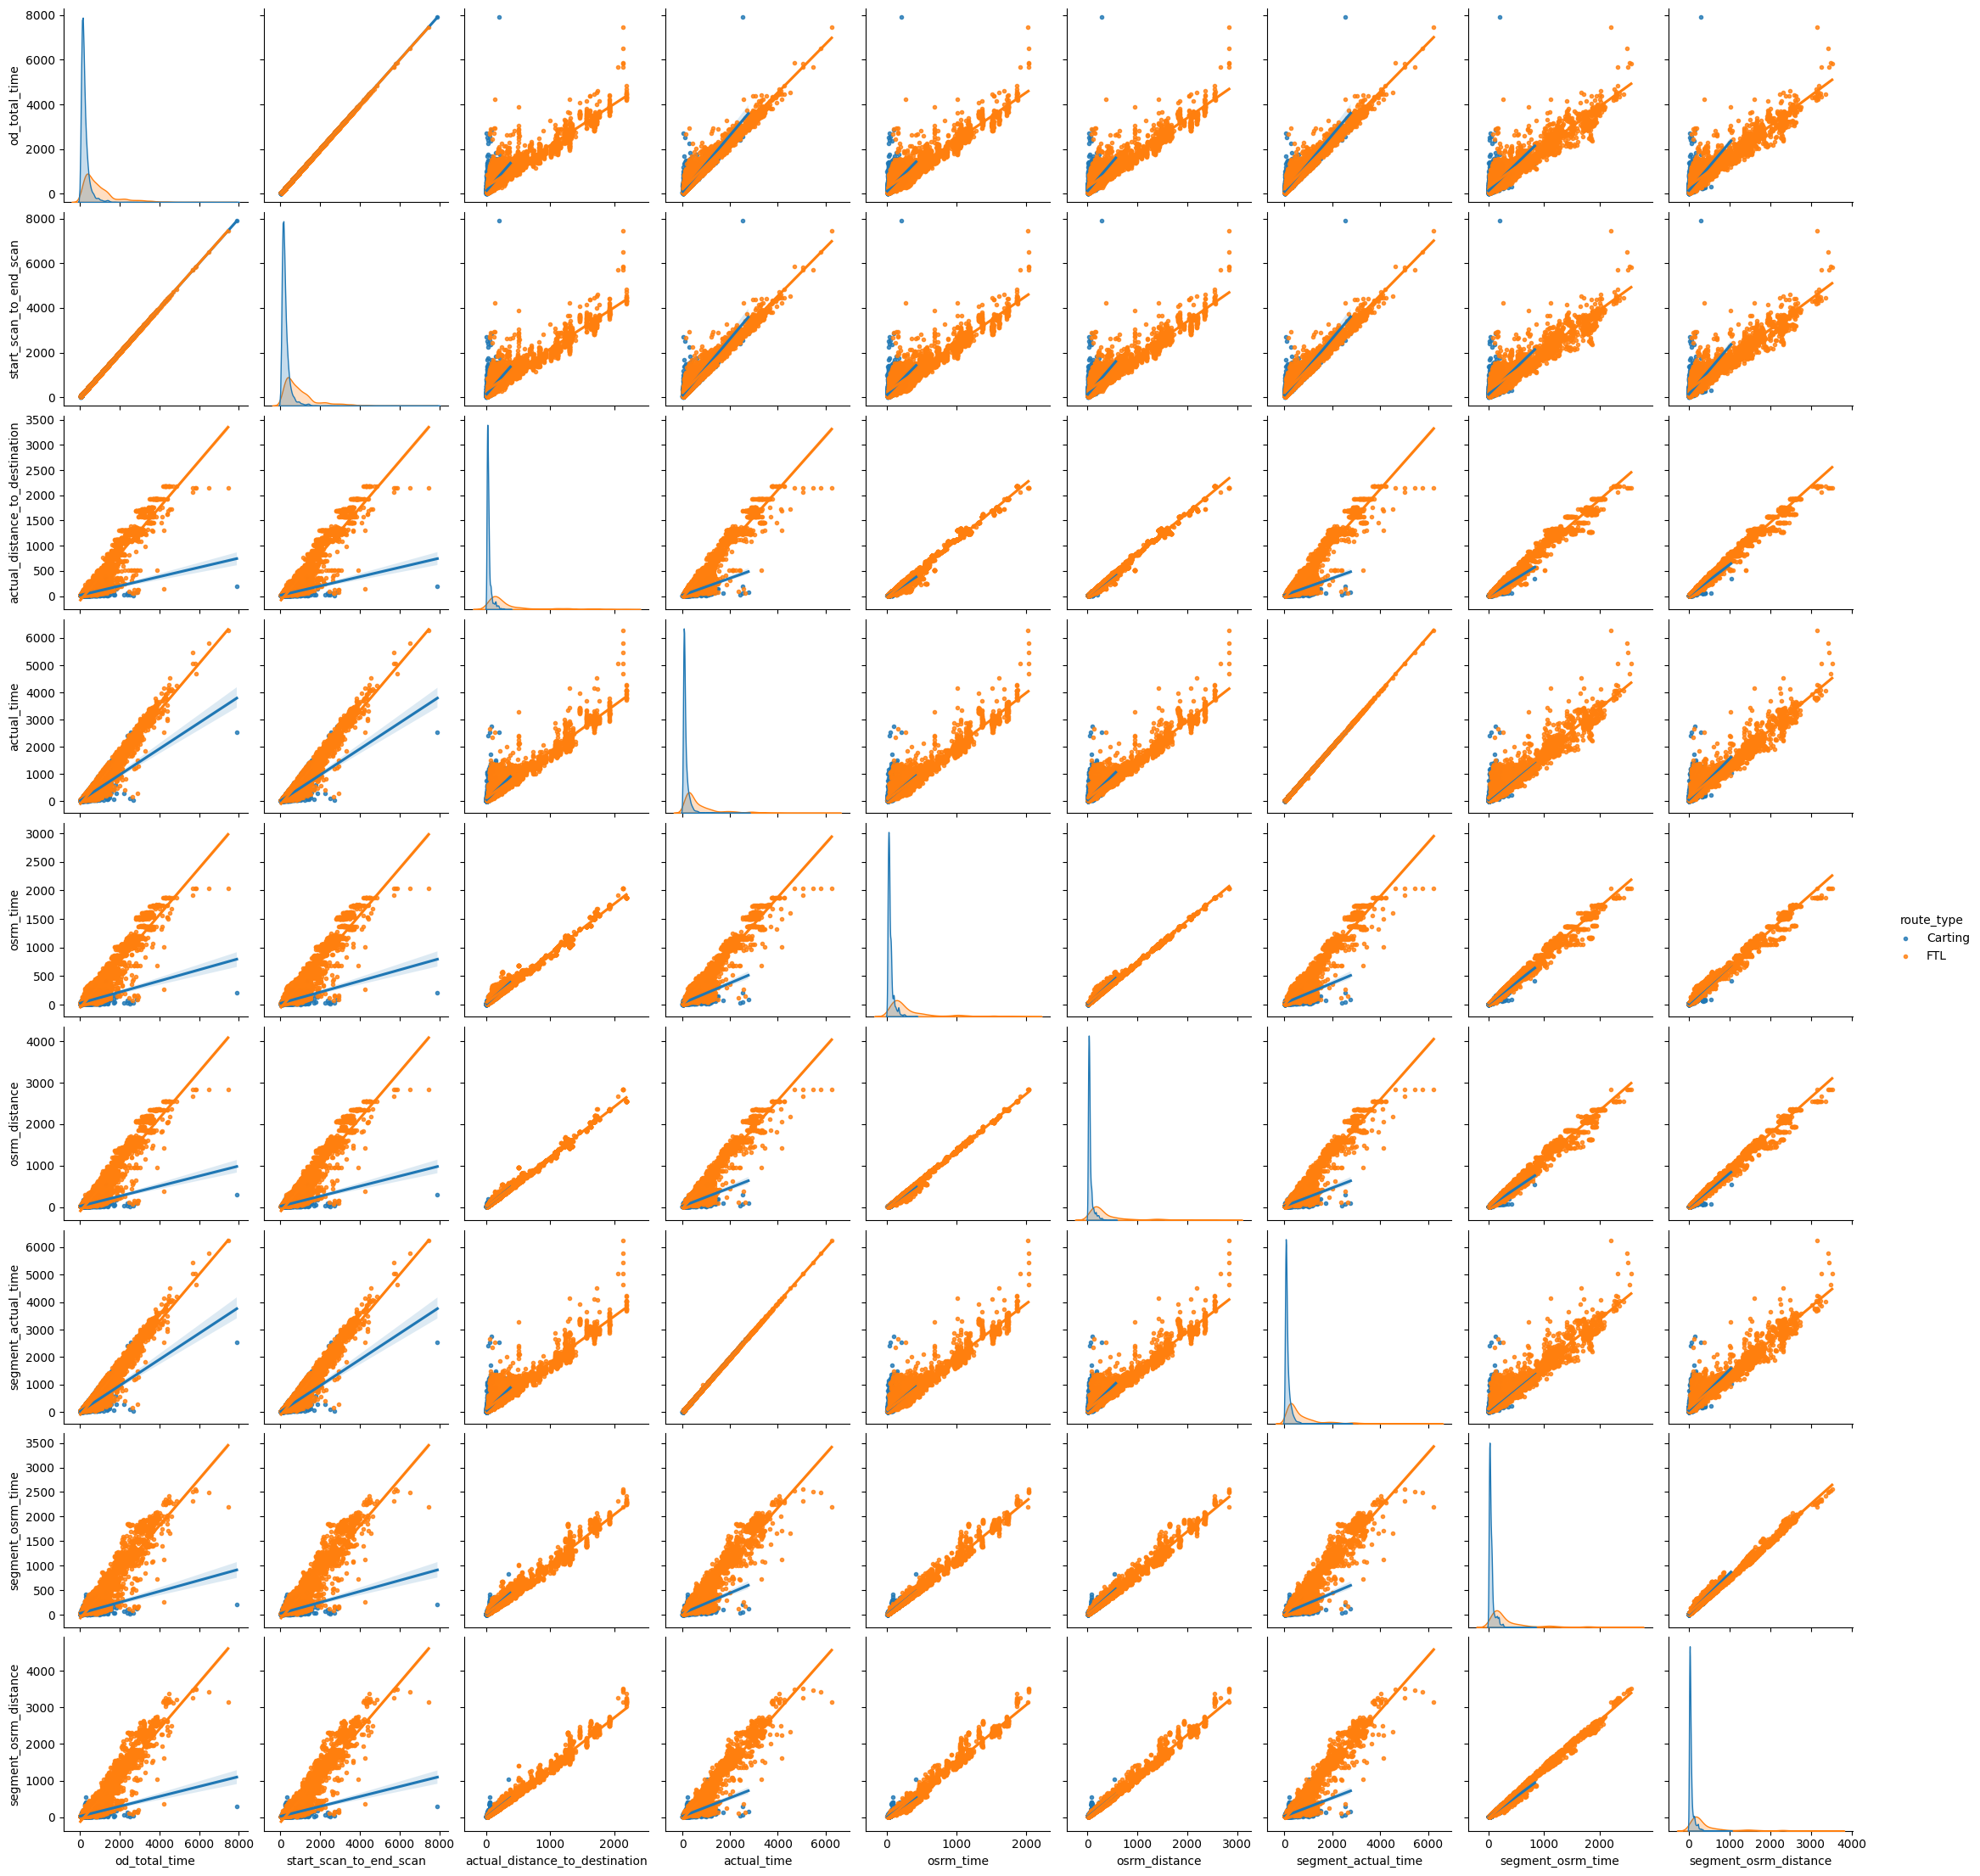

In [ ]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
plt.figure(figsize=(15,10))
sns.pairplot(data = df_final, vars = numerical_columns, kind = "reg",
            hue = 'route_type',markers = '.')
plt.show()

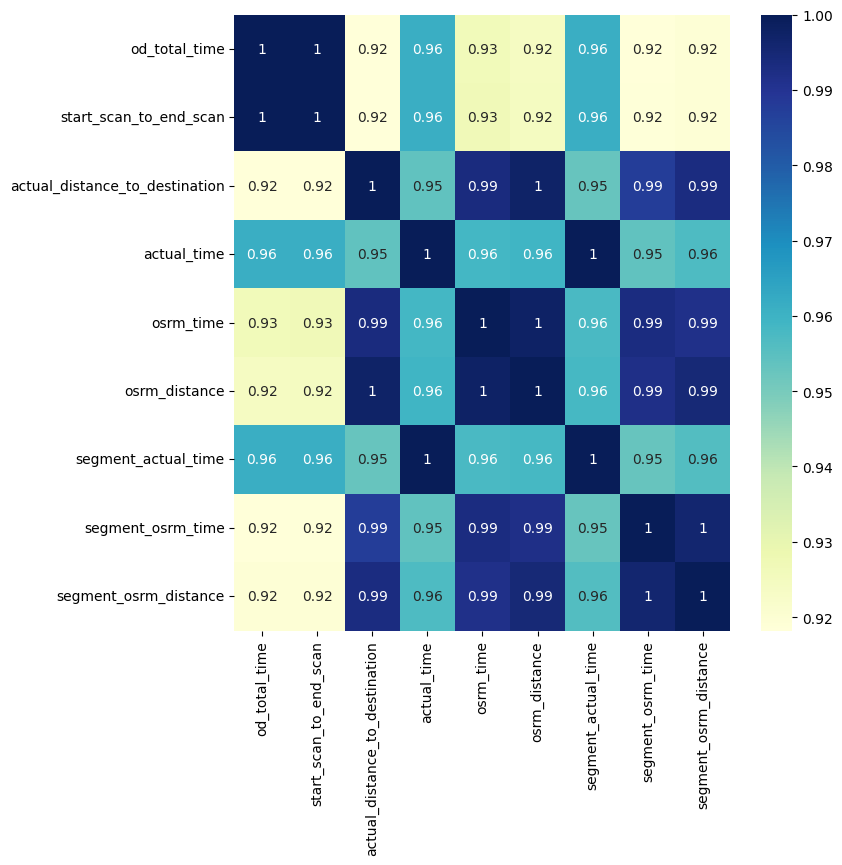

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_final[numerical_columns].corr(), annot= True, cmap = "YlGnBu")
plt.show()

## **3. In-depth analysis and feature engineering:**

**Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.**

1. Set up the null and alternate hypothesis
  * Null Hypothesis(Ho) : Total trip time(od_total_time) and expected total trip time(start_scan_to_end_scan) are the equal.

  * Alternate Hypothesis(Ha): Total trip time(od_total_time) and expected total trip time(start_scan_to_end_scan) are not equal.

2. Checking of basic assumptions of the hypothesis
  * Distribution check using QQ PLOT.
  * Homogenity of variances using Levene's test.

3. Define test statistics, distribution of T under Ho.
  * If the assumptions are met, t-test will be performed. If not, test for two independent samples will be performed.

4. Compute p-value and fix alpha value to be 0.05

5. Compare p-value and alpha value to accept or reject Ho.

Distribution check using QQ plot

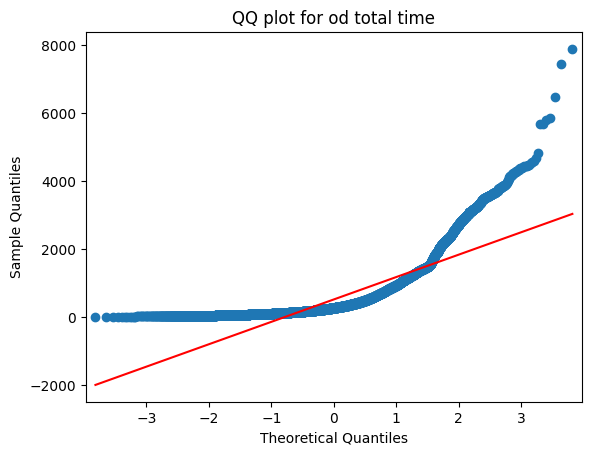

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df_final["od_total_time"], line = "s")
plt.title("QQ plot for od total time")
plt.show()

Shapiro test for normal distribution

In [ ]:
from scipy.stats import kruskal, shapiro, levene, kstest

In [ ]:
x_stat, p_value = shapiro(df_final["od_total_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution")

x_stat : 0.6686830520629883
p_value : 0.0
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


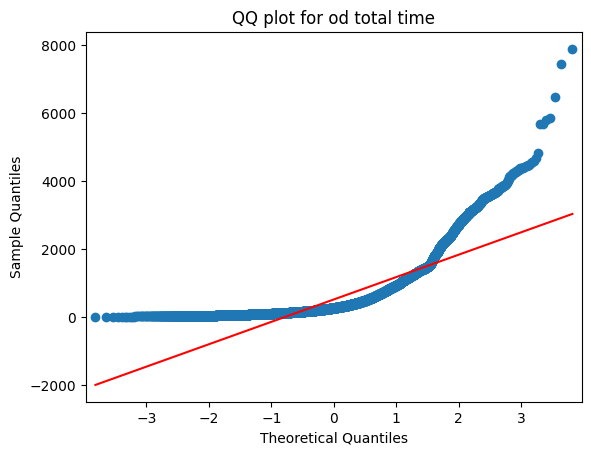

In [ ]:
qqplot(df_final["start_scan_to_end_scan"], line = "s")
plt.title("QQ plot for od total time")
plt.show()

In [ ]:
x_stat, p_value = shapiro(df_final["start_scan_to_end_scan"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution")

x_stat : 0.6683509349822998
p_value : 0.0
The sample does not follow normal distribution


**Visual test**

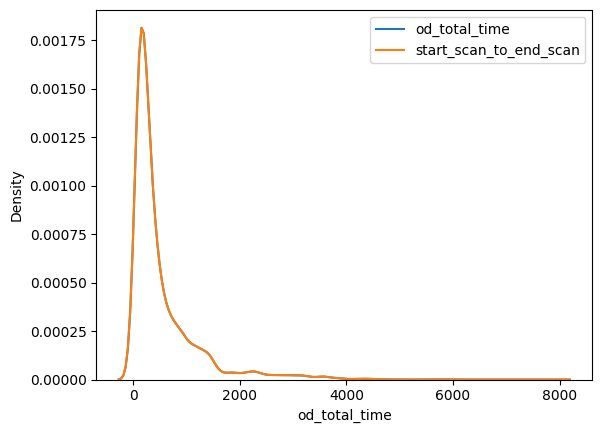

In [ ]:
sns.kdeplot(df_final["od_total_time"])
sns.kdeplot(df_final["start_scan_to_end_scan"])
plt.legend(["od_total_time","start_scan_to_end_scan"])

Levene's test

In [ ]:
# Levene test

# Ho : Homogenous variance
# Ha: Non homogenous variance
x_stat, p_value = levene(df_final["od_total_time"], df_final["start_scan_to_end_scan"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho")
else:
  print("Fail to reject Ho")

x_stat : 0.0017323484510462033
p_value : 0.9668007217581142
Fail to reject Ho


Since the samples are not normally distributed according to shapiro test, t-test cannot be applied here. Hence Kruskal test is used for two independent samples if they're similar or not

In [ ]:
# kruskal test
# Ho : Both the samples are similar
# Ha : Both the sample are different

x_stat, p_value = kruskal(df_final["od_total_time"], df_final["start_scan_to_end_scan"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Atleast one of them is different")
else:
  print("Fail to reject Ho")

x_stat : 0.07692271130268029
p_value : 0.7815118010669495
Fail to reject Ho


- Therefore it can be concluded that there is not much of a difference  between Point a. and start_scan_to_end_scan

**Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value**

In [ ]:
df_final[["actual_time","osrm_time"]].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143768,161.384018
std,561.396118,271.360992
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


**Visual test**

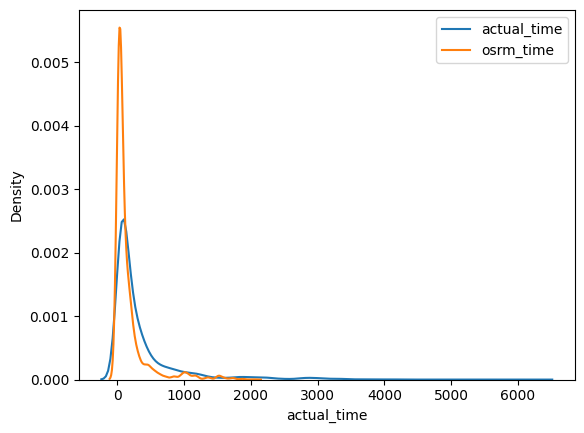

In [ ]:
sns.kdeplot(df_final["actual_time"])
sns.kdeplot(df_final["osrm_time"])
plt.legend(["actual_time","osrm_time"])

[]

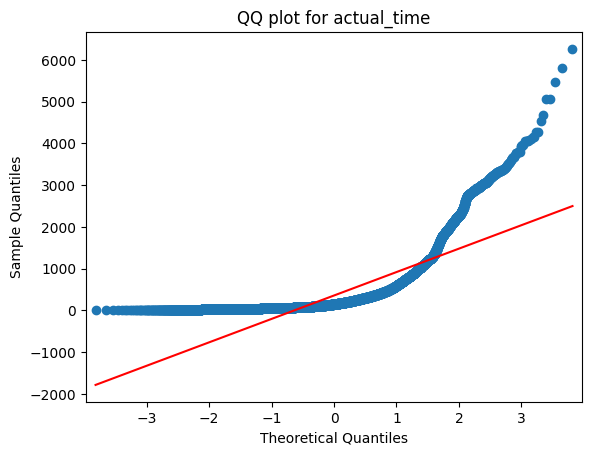

In [ ]:
qqplot(df_final['actual_time'], line = "s")
plt.title('QQ plot for actual_time')
plt.plot()

In [ ]:
# Ho : The sample follows normal distribution
# Ha : The sample does not follow normal distribution

x_stat, p_value = shapiro(df_final["actual_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution")

x_stat : 0.5816856622695923
p_value : 0.0
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


[]

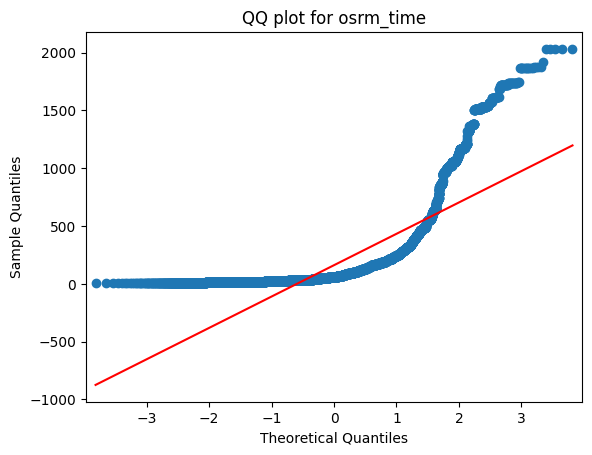

In [ ]:
qqplot(df_final['osrm_time'], line="s")
plt.title('QQ plot for osrm_time')
plt.plot()

In [ ]:
# Ho : The sample follows normal distribution
# Ha : The sample does not follow normal distribution

x_stat, p_value = shapiro(df_final["osrm_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution")

x_stat : 0.5472229719161987
p_value : 0.0
The sample does not follow normal distribution


In [ ]:
# Levene test

# Ho : Homogenous variance
# Ha: Non homogenous variance
x_stat, p_value = levene(df_final["actual_time"], df_final["osrm_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho")
else:
  print("Fail to reject Ho")

x_stat : 1021.7565660243001
p_value : 1.871098057987424e-220
Reject Ho


Since the samples are not normally distributed according to any of the above testz, t-test cannot be applied here. Hence Kruskal test is used for two independent samples to check if they're similar or not

In [ ]:
# kruskal test
# Ho : Both the samples are similar
# Ha : Both the sample are different

x_stat, p_value = kruskal(df_final["actual_time"], df_final["osrm_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Atleast one of them is different")
else:
  print("Fail to reject Ho")

x_stat : 3406.1036001589473
p_value : 0.0
Reject Ho : Atleast one of them is different


- Therefore it can be concluded that there is clear difference between the calculated actual time and the osrm time.

**Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value**

In [ ]:
df_final[["actual_time","segment_actual_time"]].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,357.143768,353.892273
std,561.396118,556.247925
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


**Visual test**

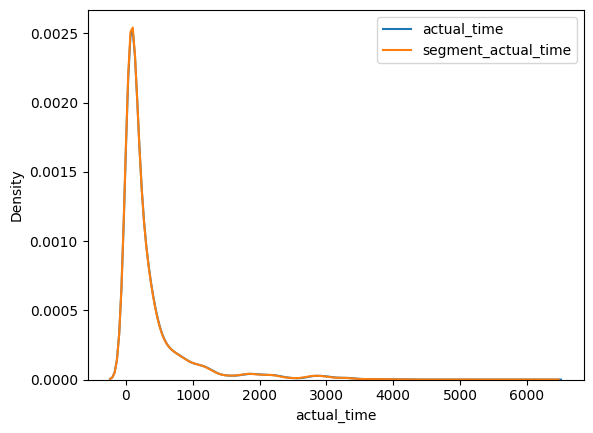

In [ ]:
sns.kdeplot(df_final["actual_time"])
sns.kdeplot(df_final["segment_actual_time"])
plt.legend(["actual_time","segment_actual_time"])

**Assumption tests**

[]

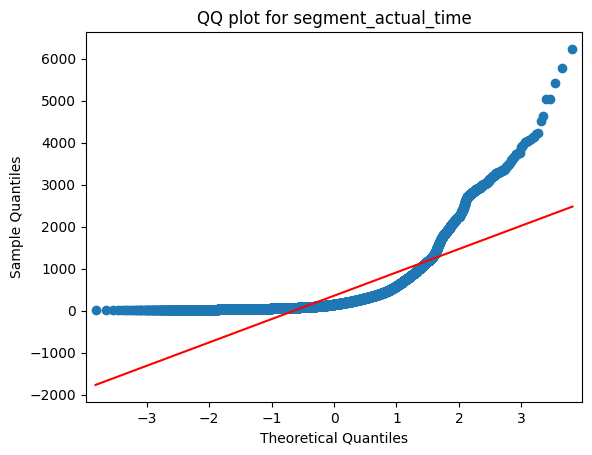

In [ ]:
qqplot(df_final['segment_actual_time'], line="s")
plt.title('QQ plot for segment_actual_time')
plt.plot()

In [ ]:
# Ho : The sample follows normal distribution
# Ha : The sample does not follow normal distribution
x_stat, p_value = shapiro(df_final["segment_actual_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution")

x_stat : 0.5821862816810608
p_value : 0.0
The sample does not follow normal distribution


The QQ PLOT for actual time was already drawn before and shapiro test also said it doesn't follow normal distribution

In [ ]:
# Levene test

# Ho : Homogenous variance
# Ha: Non homogenous variance
x_stat, p_value = levene(df_final["actual_time"], df_final["segment_actual_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho")
else:
  print("Fail to reject Ho")

x_stat : 0.15319625354433347
p_value : 0.695502241317651
Fail to reject Ho


Since the results from shapiro tests shows that the distribution is not normal, kruskal test is performed to find if the two independent samples are similar or not

In [ ]:
# kruskal test
# Ho : Both the samples are similar
# Ha : Both the sample are different

x_stat, p_value = kruskal(df_final["actual_time"], df_final["segment_actual_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Atleast one of them is different")
else:
  print("Fail to reject Ho")

x_stat : 0.6603876360800134
p_value : 0.4164231265256002
Fail to reject Ho


- Therefore, its clear that the two independent samples(actual time and segment actual time) are similar.

**Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value**

In [ ]:
df_final[["osrm_distance", "segment_osrm_distance"]].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,204.344711,223.201157
std,370.395569,416.628387
min,9.072900,9.072900
25%,30.819201,32.654499
50%,65.618805,70.154404
75%,208.475006,218.802399
max,2840.081055,3523.632324


**Visual test**

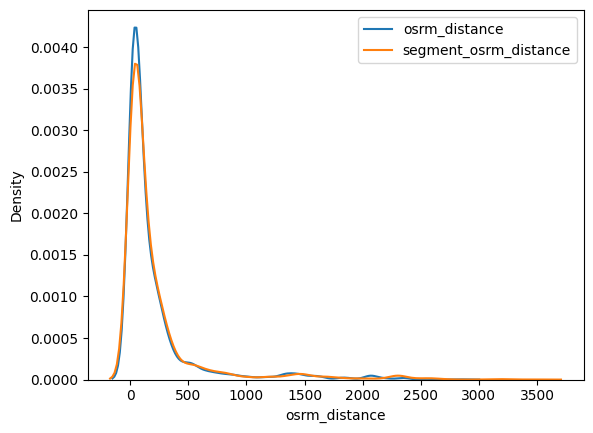

In [ ]:
sns.kdeplot(df_final["osrm_distance"])
sns.kdeplot(df_final["segment_osrm_distance"])
plt.legend(["osrm_distance","segment_osrm_distance"])

QQ plot for distribution check

In [ ]:
import scipy.stats as spy

[]

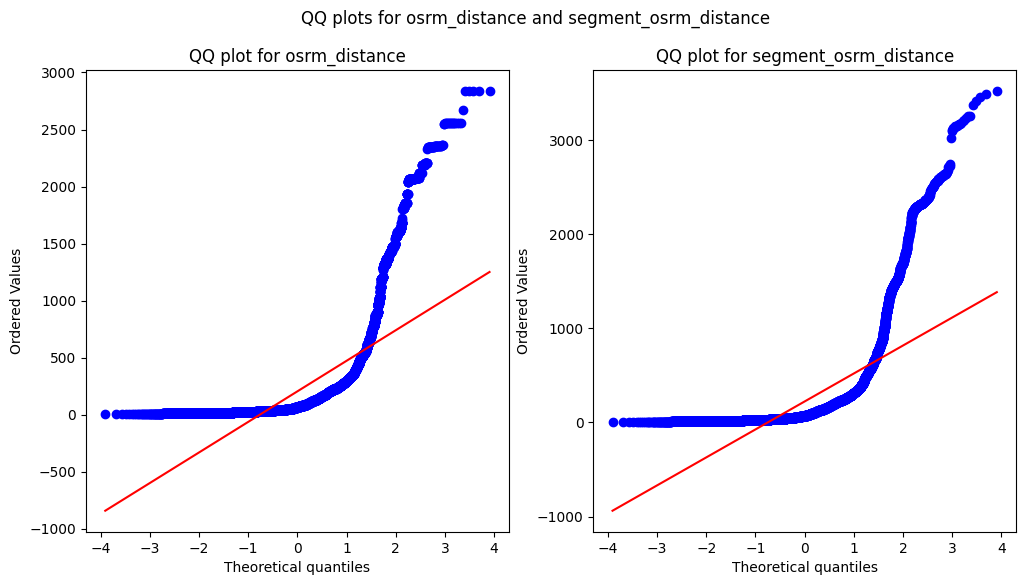

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df_final['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df_final['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

**Shapiro test to check for normality**

In [ ]:
# Ho : The sample follows normal distribution
# Ha : The sample does not follow normal distribution
x_stat, p_value = shapiro(df_final["osrm_distance"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution")

x_stat : 0.5229898691177368
p_value : 0.0
The sample does not follow normal distribution


In [ ]:
# Ho : The sample follows normal distribution
# Ha : The sample does not follow normal distribution
x_stat, p_value = shapiro(df_final["segment_osrm_distance"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution")

x_stat : 0.5084269046783447
p_value : 0.0
The sample does not follow normal distribution


**Levene's test**

In [ ]:
# Levene test

# Ho : Homogenous variance
# Ha: Non homogenous variance
x_stat, p_value = levene(df_final["osrm_distance"], df_final["segment_osrm_distance"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho")
else:
  print("Fail to reject Ho")

x_stat : 13.744989014515468
p_value : 0.00020976006524780905
Reject Ho


Since the samples doesn't follow the normal distribution, kruskal test is used to find the similiarity between two independent samples

In [ ]:
# kruskal test
# Ho : Both the samples are similar
# Ha : Both the sample are different

x_stat, p_value = kruskal(df_final["osrm_distance"], df_final["segment_osrm_distance"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Atleast one of them is different")
else:
  print("Fail to reject Ho")

x_stat : 24.024983074452994
p_value : 9.509377942769529e-07
Reject Ho : Atleast one of them is different


- Therefore, it is clear that both the independent samples(*osrm_distance and segment_osrm_distance*) are different from eachother.

**Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value**

In [ ]:
df_final[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14817.000000,14817.000000
mean,161.384018,180.949783
std,271.360992,314.542053
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,2032.000000,2564.000000


**Visual test**

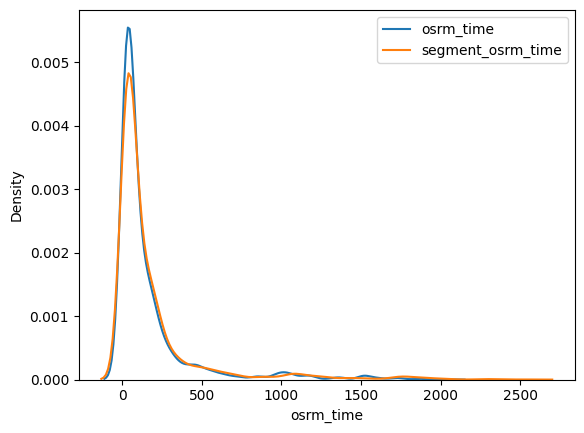

In [ ]:
sns.kdeplot(df_final["osrm_time"])
sns.kdeplot(df_final["segment_osrm_time"])
plt.legend(["osrm_time","segment_osrm_time"])

QQ plot and shapiro test were done for osrm_time already. And they're not normal. Hence performing QQ and shapiro for segment_osrm_time alone

QQ plot for distribution check



[]

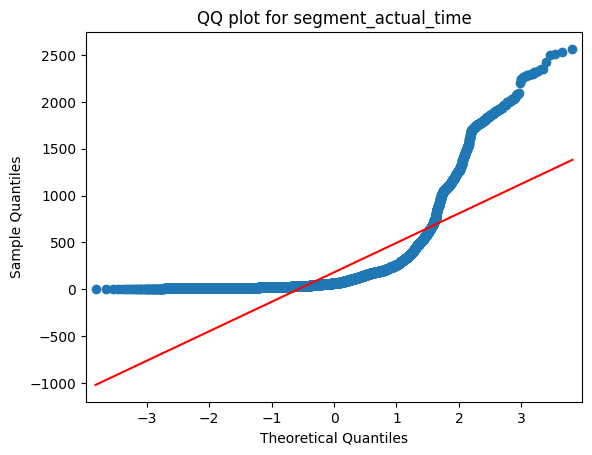

In [ ]:
qqplot(df_final['segment_osrm_time'], line="s")
plt.title('QQ plot for segment_actual_time')
plt.plot()

Shapiro's test for normal distribution

In [ ]:
# Ho : The sample follows normal distribution
# Ha : The sample does not follow normal distribution
x_stat, p_value = shapiro(df_final["segment_osrm_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("The sample does not follow normal distribution")
else:
  print("The sample follows normal distribution")

x_stat : 0.5331965684890747
p_value : 0.0
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Levene's test

In [ ]:
# Levene test

# Ho : Homogenous variance
# Ha: Non homogenous variance
x_stat, p_value = levene(df_final["osrm_time"], df_final["segment_osrm_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho")
else:
  print("Fail to reject Ho")

x_stat : 28.737665787829933
p_value : 8.349506135727595e-08
Reject Ho


All the above tests have rejected the null hypothesis and has shown that the distribution is not normal. T-test cannot be performed and kruskal test will be done to see the similarity between the samples

Kruskal's test

In [ ]:
# kruskal test
# Ho : Both the samples are similar
# Ha : Both the sample are different

x_stat, p_value = kruskal(df_final["osrm_time"], df_final["segment_osrm_time"])
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Atleast one of them is different")
else:
  print("Fail to reject Ho")

x_stat : 31.223605570361187
p_value : 2.2995280965453158e-08
Reject Ho : Atleast one of them is different


- Hence this proves that both the samples(osrm_time and segment osrm time) are not similar.

**Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis**

In [ ]:
import matplotlib as mpl

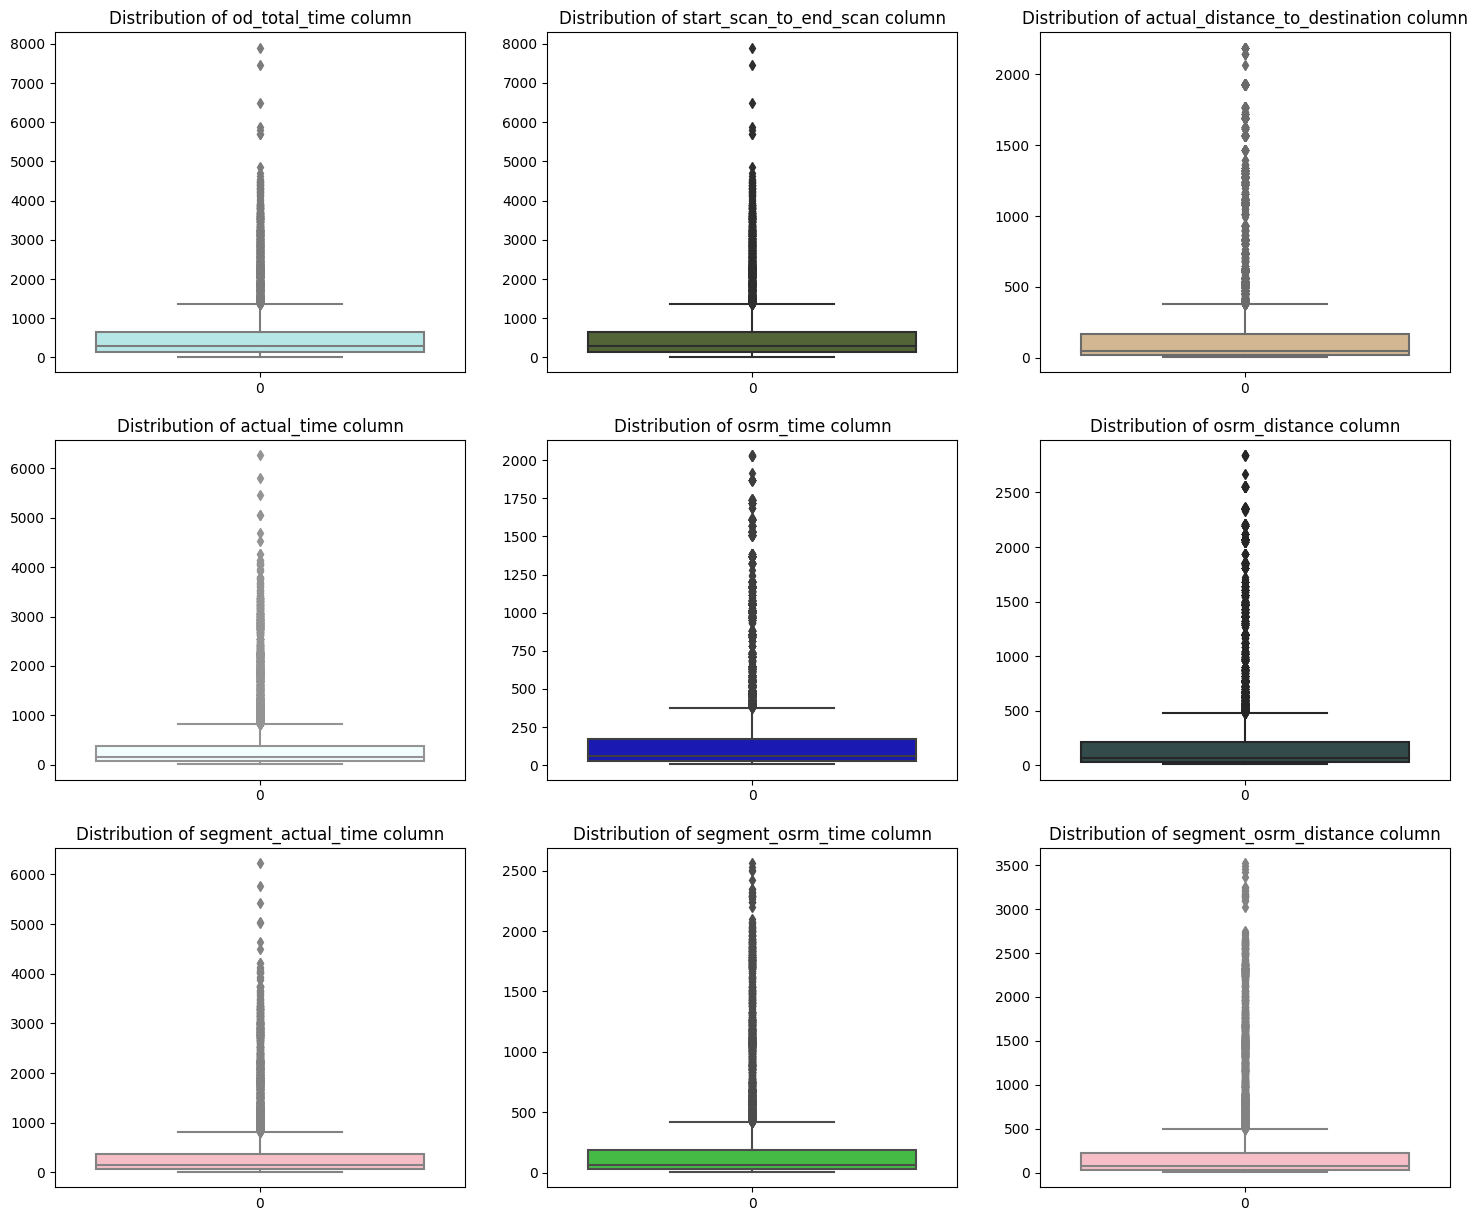

In [ ]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.boxplot(df_final[numerical_columns[i]], color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

**Handle the outliers using the IQR method.**

In [ ]:
# Detecting Outliers

for i in numerical_columns:
    Q1 = np.quantile(df_final[i], 0.25)
    Q2 = np.quantile(df_final[i], 0.50)
    Q3 = np.quantile(df_final[i], 0.75)
    IQR = Q3 - Q1
    LW = max(Q1 - 1.5 * IQR,0)
    UW = Q3 + 1.5 * IQR
    outliers = df2.loc[(df2[i] < LW) | (df2[i] > UW)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f"Q2 : {Q2} ")
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'Lower_whisker : {LW}')
    print(f'Upper_whisker : {UW}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('---------------------------')

Column : od_total_time
Q1 : 149.93
Q2 : 280.77 
Q3 : 638.2
IQR : 488.27000000000004
Lower_whisker : 0
Upper_whisker : 1370.605
Number of outliers : 1266
---------------------------
Column : start_scan_to_end_scan
Q1 : 149.0
Q2 : 280.0 
Q3 : 637.0
IQR : 488.0
Lower_whisker : 0
Upper_whisker : 1369.0
Number of outliers : 1267
---------------------------
Column : actual_distance_to_destination
Q1 : 22.837238311767578
Q2 : 48.47407150268555 
Q3 : 164.5832061767578
IQR : 141.74596786499023
Lower_whisker : 0
Upper_whisker : 377.20215797424316
Number of outliers : 1449
---------------------------
Column : actual_time
Q1 : 67.0
Q2 : 149.0 
Q3 : 370.0
IQR : 303.0
Lower_whisker : 0
Upper_whisker : 824.5
Number of outliers : 1643
---------------------------
Column : osrm_time
Q1 : 29.0
Q2 : 60.0 
Q3 : 168.0
IQR : 139.0
Lower_whisker : 0
Upper_whisker : 376.5
Number of outliers : 1517
---------------------------
Column : osrm_distance
Q1 : 30.81920051574707
Q2 : 65.61880493164062 
Q3 : 208.4750061

**Do one-hot encoding of categorical variables (like route_type)**

In [ ]:
df_final['route_type'].value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_final['route_type'] = label_encoder.fit_transform(df_final['route_type'])

In [ ]:
# value counts after one-hot encoding

df_final['route_type'].value_counts()

0    8908
1    5909
Name: route_type, dtype: int64

**Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

[]

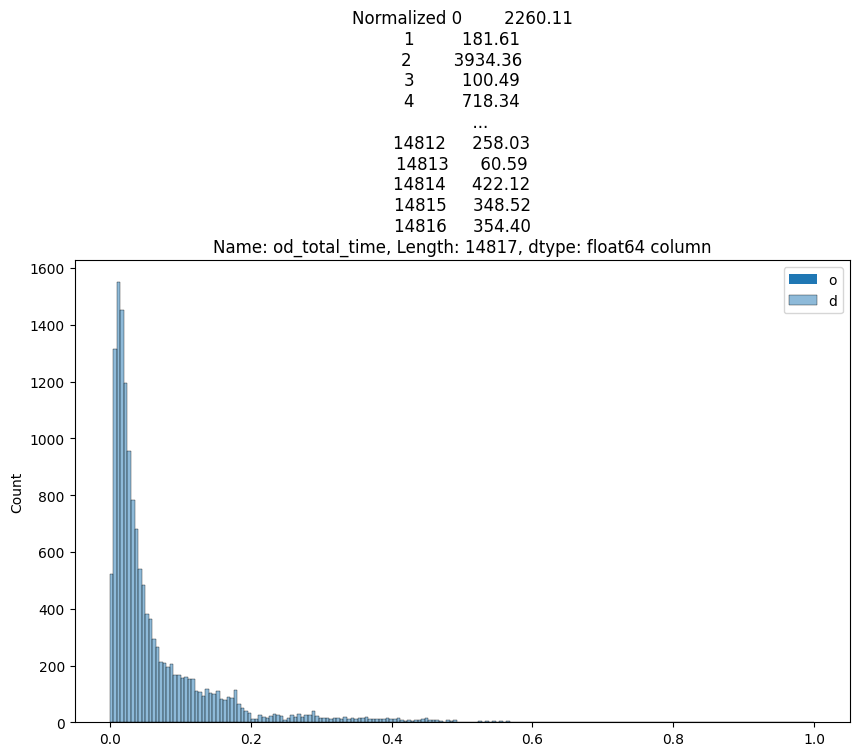

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_final['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df_final['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

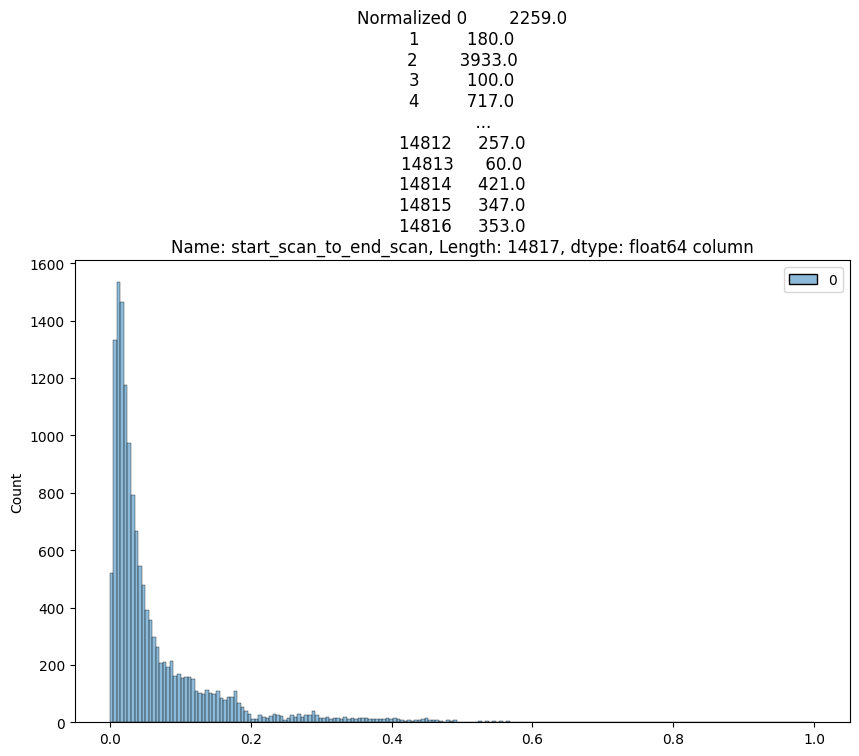

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_final['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df_final['start_scan_to_end_scan']} column")
plt.plot()

[]

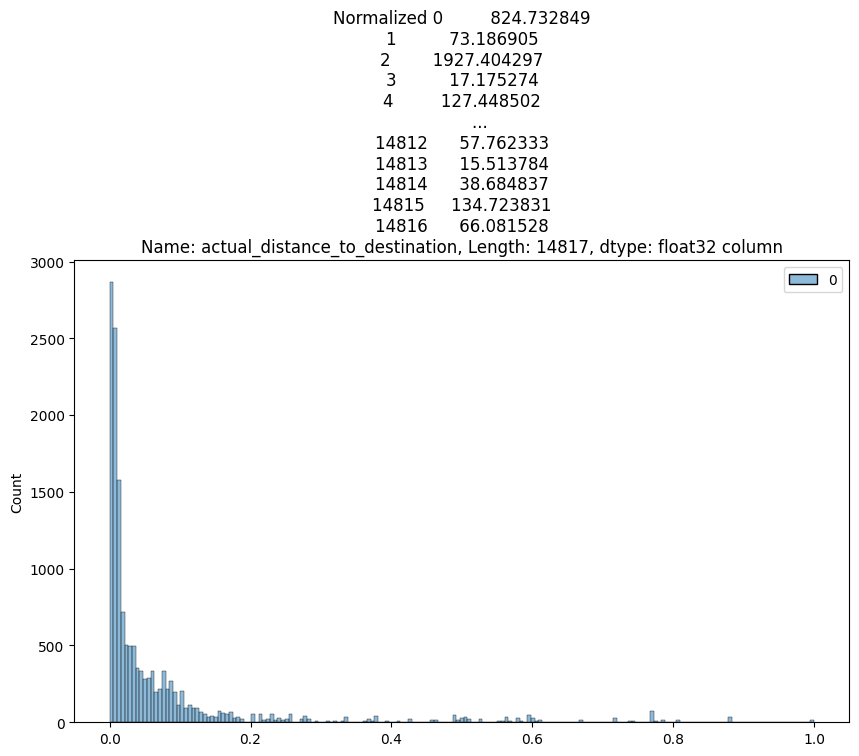

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_final['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df_final['actual_distance_to_destination']} column")
plt.plot()

[]

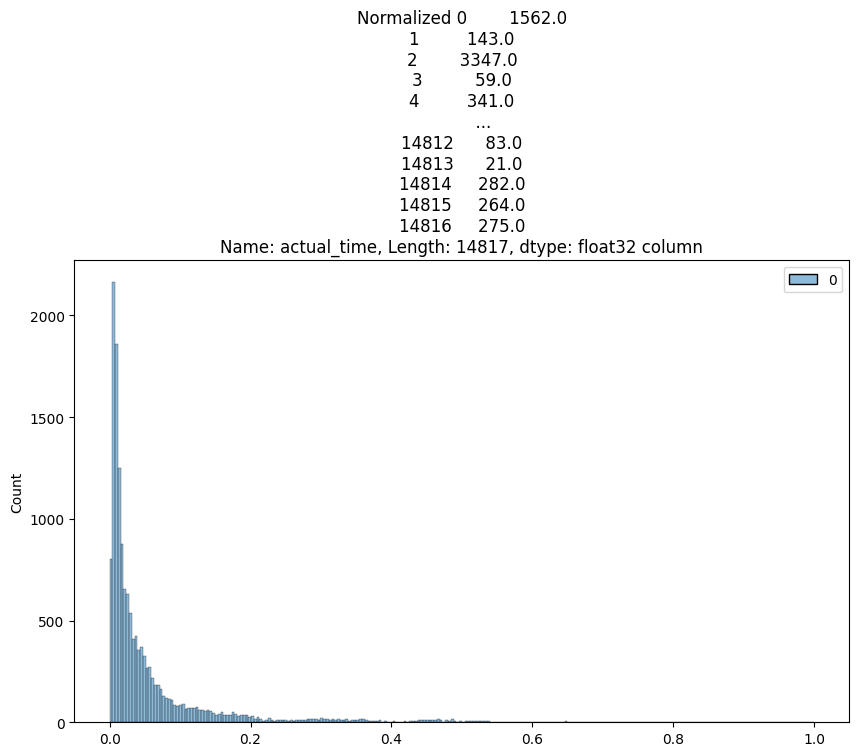

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_final['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df_final['actual_time']} column")
plt.plot()

[]

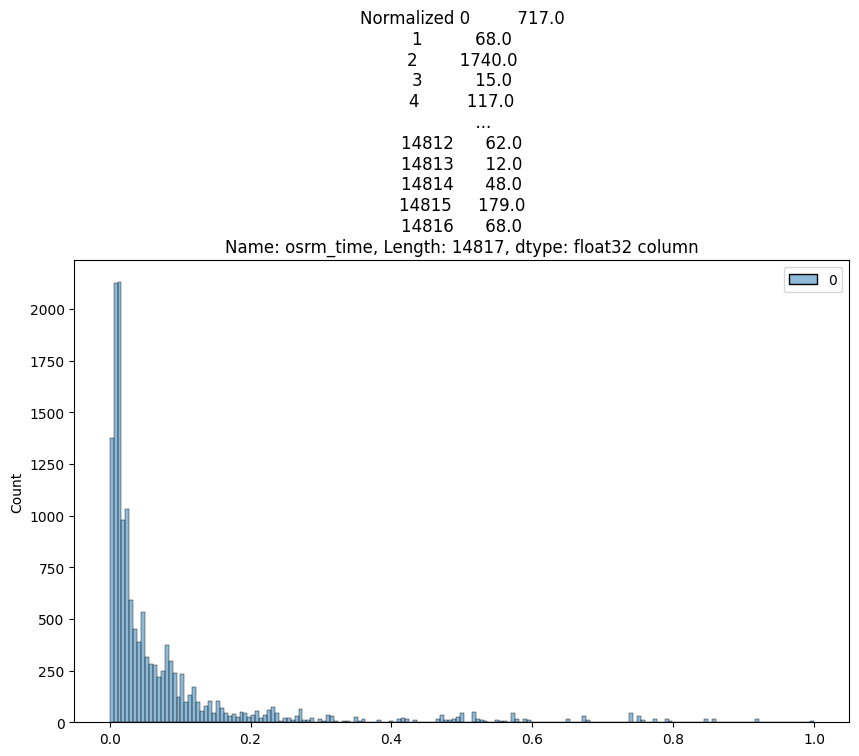

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_final['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df_final['osrm_time']} column")
plt.plot()

[]

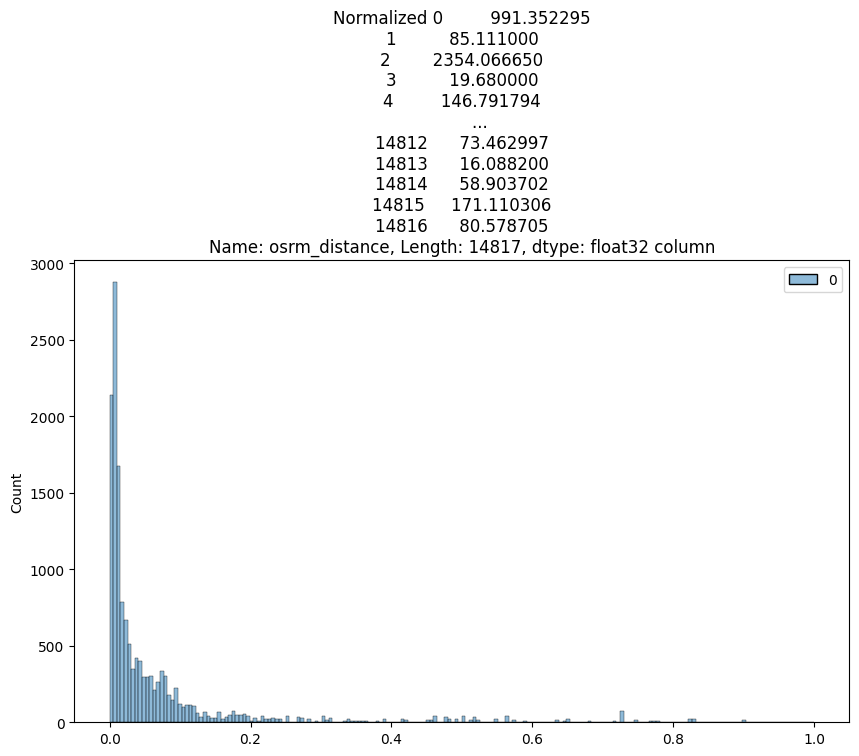

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_final['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df_final['osrm_distance']} column")
plt.plot()

## **Business Insights**

- The data had **14,817 unique trip ids**, ***1508 source centers*** and ***1481 destination centers***.
- The given data is from 12-09-2018 to 08-10-2018 (ie) **27 days**
- The data had 2 types of routes - Carting and FTL and among this the most common was **Carting** - 60.12%(8908) as observed in the univariate analysis.
- Total no. of **source states** involved in this tracking is** 34.** Among which most orders started from **Maharashtra, Karnataka, Haryana and Tamilnadu**. All of them have more than 1000 orders.
- Total no. of **destination states** involved in this tracking is **39**. Again **Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh** are the leading ones.
- Total no. of **source cities** involved in this tracking is **690**. Cities in which most delivery starts are **Mumbai, Gurgaon, Delhi and Bangalore**.
- Total no. of **destination cities involved in this tracking is 806**. And the destination of travel are also topped by the same 4 cities **Mumbai, Gurgaon, Delhi and Bangalore**.
- Based on the line plot analysis done for trip creation day, it's been observed that most trips have been created on **18th of the September(791)** followed by 15th(780)
- Among the weeks, **38th week has the most number of trip creation counts (ie) 5000+.**
- Among the 2 months given in the data, more than **87.93% (13,029)** of the trips were created on September and the rest were created on October.
- In the heatmap created by the correlated datas of numerical values, it's been observed that max correlation is found between "osrm_time" and "actual_distance_to_destination", "osrm_time" and "segment_osrm_time", "osrm_time" and "segment_osrm_distance", "osrm_distance" and "segment_osrm_distance".
- Features "total_time" taken and "start_scan_to_end_scan" are similar, as observed in the hypothesis testing
- Features "actual time" and "osrm time" are definitely not similar as tested earlier
- Features "actual time" and "segment actual time" are similar
- Features "osrm distance" and "segment osrm distance" are not similar
- Features "osrm time" and " segment osrm time" are not similar as per the hypothesis testing

## **Recommendations**

-  More than 14 locations have been missing in the data, data profiling and coding should be done in a proper manner, without much changes to eachother in the terms of formatting, since some source and destination names have very different methods of formatting.
- As observed, since most of the OSRM calculations are not matching with the actual numbers, efforts should be taken to generate a proper factors based on the route and distance followed and then prediction should be done.
- Delhivery services seems more prominent only in the 4 states - Maharashtra, Karnataka, Haryana and Tamil Nadu. They can expand their business more in other areas as well.
- Among cities Mumbai, Gurgaon, Delhi and Bangalore has the most number of orders in the said period, more care can be taken in the other cities as well.
- Places like Bihar, Punjab, Jharkhand, Rajasthan and Andhra Pradesh are some of those unique districts where FTL(Full truck load) is the most followed route type. Based on the location, requests and distance, the route type can be updated.
